In [1]:
import numpy as np
import  pandas as pd
from scipy import stats
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a=yf.download("AAPL", start="2009-01-01", end="2022-12-02")
spc=yf.download("^GSPC", start="2009-01-01", end="2022-12-02")
micro=yf.download("MSFT", start="2009-01-01", end="2022-12-02")
amzn=yf.download("AMZN", start="2009-01-01", end="2022-12-02")
alphabet=yf.download("GOOGL", start="2009-01-01", end="2022-12-02")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
appel=a["Adj Close"]
msft=micro["Adj Close"]
sp500=spc["Adj Close"]
amazon=amzn["Adj Close"]
google=alphabet["Adj Close"]

In [4]:
data=pd.DataFrame(appel)
data1=pd.DataFrame(msft)
data2=pd.DataFrame(google)
data3=pd.DataFrame(amazon)
data4=pd.DataFrame(sp500)

frame=(data, data1, data2, data3, data4)
isim=["AAPL", "MSFT"," GOOGLE","AMAZON","SP500"]
df=pd.concat(frame,keys=isim,axis=1)
df

,AAPL,MSFT,GOOGLE,AMAZON,SP500
,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,
2009-01-02,2.762747,15.200122,8.041041,2.718000,931.799988
2009-01-05,2.879345,15.342186,8.209459,2.703000,927.450012
2009-01-06,2.831855,15.521626,8.359860,2.868000,934.700012
2009-01-07,2.770663,14.587038,8.058308,2.810000,906.650024
2009-01-08,2.822112,15.043117,8.137888,2.858000,909.729980
...,...,...,...,...,...
2022-11-25,148.110001,247.490005,97.459999,93.410004,4026.120117
2022-11-28,144.220001,241.759995,96.050003,93.949997,3963.939941


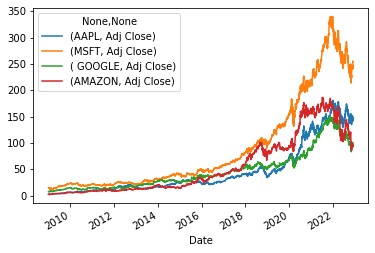

In [99]:
plotstocks=(data, data1, data2, data3)
name=["AAPL", "MSFT"," GOOGLE","AMAZON"]

stocks=pd.concat(plotstocks,keys=name,axis=1)
stocks.plot();

In [5]:
cor_data=df.pct_change().corr()
cor_data

,,AAPL,MSFT,GOOGLE,AMAZON,SP500
,,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
AAPL,Adj Close,1.000000,0.575170,0.575880,0.473532,0.687335
MSFT,Adj Close,0.575170,1.000000,0.634416,0.552823,0.748007
GOOGLE,Adj Close,0.575880,0.634416,1.000000,0.576983,0.711555
AMAZON,Adj Close,0.473532,0.552823,0.576983,1.000000,0.568399
SP500,Adj Close,0.687335,0.748007,0.711555,0.568399,1.000000


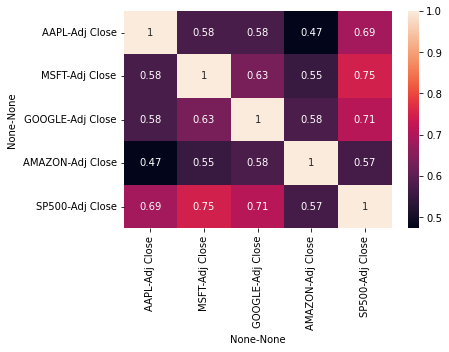

In [98]:
sns.heatmap(cor_data, annot=True);

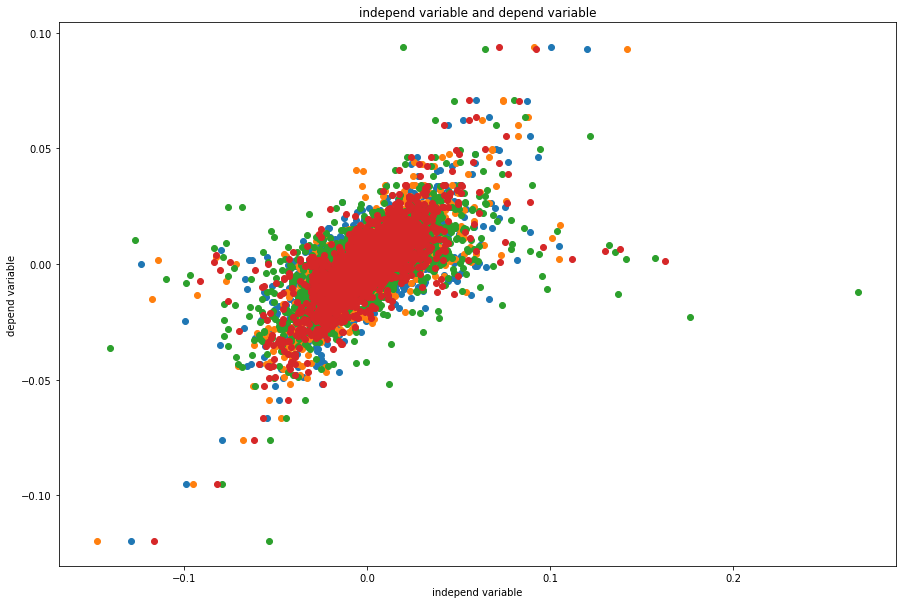

In [86]:
a=appel.pct_change()
b=msft.pct_change()
c=sp500.pct_change()
d=amazon.pct_change()
e=google.pct_change();

iv=(a,b,d,e)
dv=(c)


fig, ax= plt.subplots(figsize=(15,10))
ax.scatter(x=a, y=c)
ax.scatter(x=b, y=c)
ax.scatter(x=d, y=c)
ax.scatter(x=e, y=c)

ax.set(title="independ variable and depend variable",
       xlabel="independ variable",
       ylabel="depend variable");

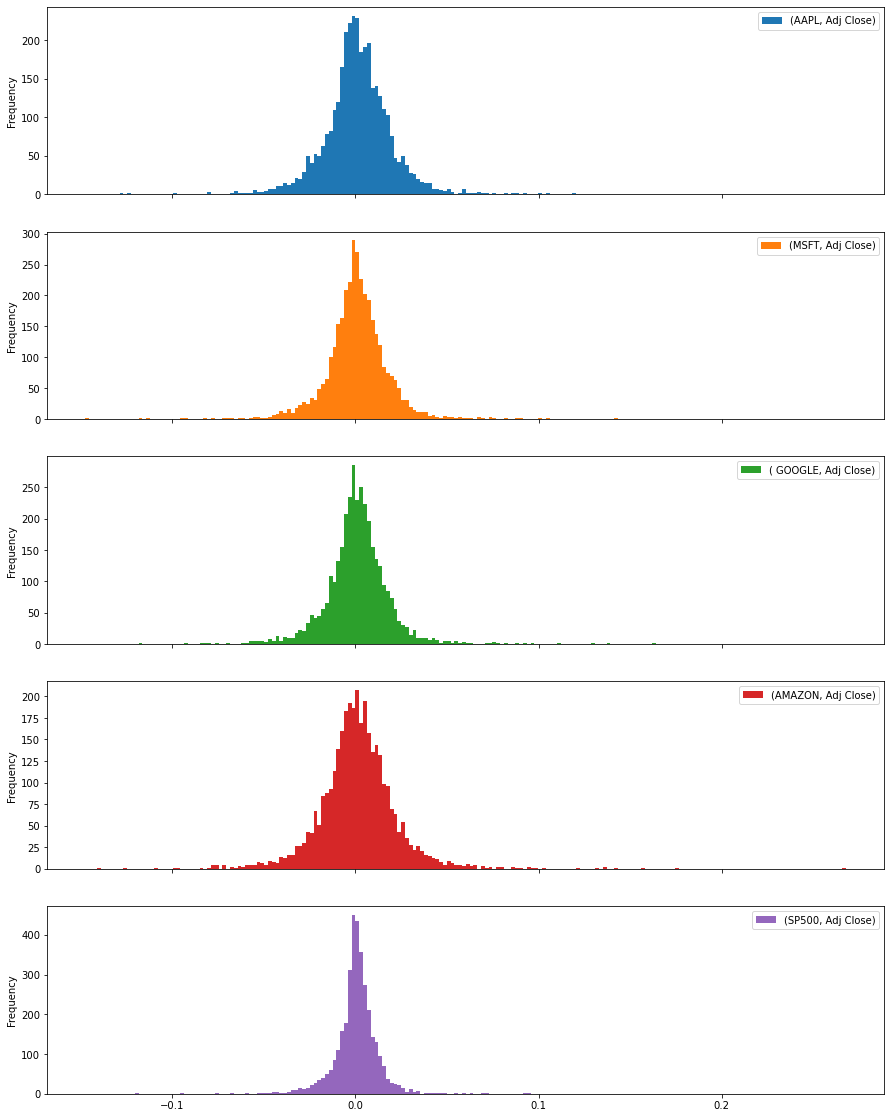

In [91]:
Daily_return.plot.hist(figsize=(15,20),subplots=True,bins=200);

In [9]:
from sklearn import linear_model

In [37]:
X=df[["AAPL", "MSFT"," GOOGLE","AMAZON"]]
y=df[["SP500"]]

In [11]:
reg= linear_model.LinearRegression()
reg.fit(X, y)

C:\Users\CASPER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [12]:
reg.coef_

array([[ 5.36527809, -8.33489184, 30.0994384 ,  7.67017101]])

In [13]:
reg.intercept_

array([973.44307074])

In [14]:
reg.score(X,y)


C:\Users\CASPER\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.9685249783722029

In [15]:
import statsmodels.api as sm

In [16]:
X = sm.add_constant(X)

In [17]:
 model = sm.OLS(y, X)

In [18]:
 results = model.fit()

In [19]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        SP500_Adj Close   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                 2.692e+04
Date:                Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:45:15   Log-Likelihood:                -23186.
No. Observations:                3504   AIC:                         4.638e+04
Df Residuals:                    3499   BIC:                         4.641e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   